Dataset Preview:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


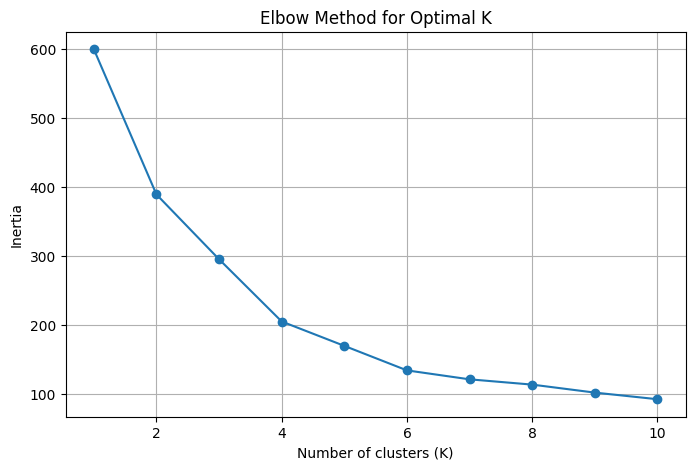

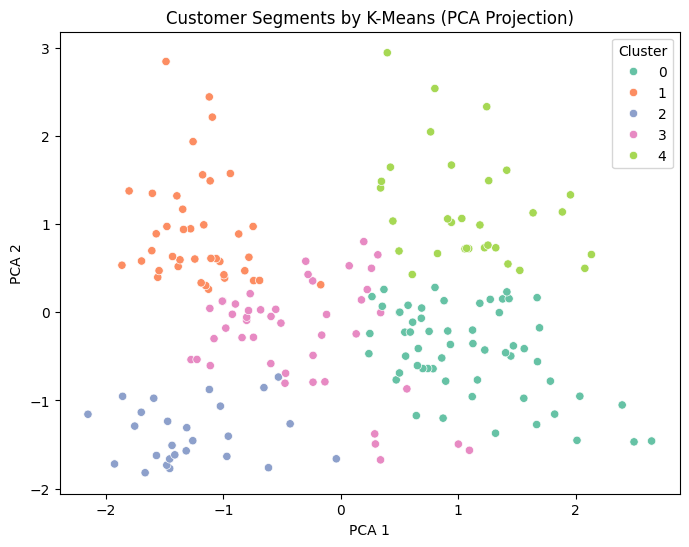

Silhouette Score for K=5: 0.4085


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
path = r"C:\Users\TANYA\OneDrive\Desktop\archive\Mall_Customers.csv"
df = pd.read_csv(path)

# Display first few rows
print("Dataset Preview:\n", df.head())

# Drop CustomerID and Gender for clustering
data = df.drop(['CustomerID', 'Gender'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Fit KMeans with optimal K (e.g., 5 based on elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to original dataframe
df['Cluster'] = labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='Set2')
plt.title('Customer Segments by K-Means (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Evaluate clustering
sil_score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.4f}')
